# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

# Reading and copying the dataset

In [2]:
# Install ipython-sql if you haven't already (comment if you have it)
!pip install ipython-sql

# Load the ipython-sql extension
%load_ext sql

# Connect to the SQLite database
%sql sqlite:///med.db
# List all tables in the database
%sql SELECT name FROM sqlite_master WHERE type='table';
# Get the structure of the 'medicine_table'
%sql PRAGMA table_info(medicine_table);
# Get the structure of the 'doctor_table'
%sql PRAGMA table_info(doctor_table); 
# Use the %sql magic to perform the join between 2 tables across the id column
%sql SELECT * FROM medicine_table AS m JOIN doctor_table AS d ON m.id_m = d.id_dr;
# Load the result into a DataFrame using the %sql magic
result = %sql SELECT * FROM medicine_table AS m JOIN doctor_table AS d ON m.id_m = d.id_dr;

# Convert the result to a Pandas DataFrame
df = result.DataFrame()

 * sqlite:///med.db
Done.
 * sqlite:///med.db
Done.
 * sqlite:///med.db
Done.
 * sqlite:///med.db
Done.
 * sqlite:///med.db
Done.


In [3]:
print(df.shape)
display(df)
data_cpy = df.copy()

(390, 10)


,id_m,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,type1,45,1,area1,chest,a,200,clinic,1
1,2,type4,36,2,area2,im,b,100,clinic,1
2,3,type1,45,3,area8,chest,a,75,hospital,1
3,4,type1,45,4,area5,chest,a,30,hospital,1
4,5,type5,29,5,area6,uro,a,220,clinic,0
...,...,...,...,...,...,...,...,...,...,...
385,386,type5,29,386,area8,sur,b,75,hospital,0
386,387,type2,30,387,area2,im,b,70,hospital,0
387,388,type1,45,388,area7,im,a,120,clinic,1
388,389,type1,45,389,area8,sur,b,75,hospital,1


# Removing Duplicates

In [4]:
data_cpy = data_cpy.drop_duplicates()
display(data_cpy)

,id_m,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,type1,45,1,area1,chest,a,200,clinic,1
1,2,type4,36,2,area2,im,b,100,clinic,1
2,3,type1,45,3,area8,chest,a,75,hospital,1
3,4,type1,45,4,area5,chest,a,30,hospital,1
4,5,type5,29,5,area6,uro,a,220,clinic,0
...,...,...,...,...,...,...,...,...,...,...
385,386,type5,29,386,area8,sur,b,75,hospital,0
386,387,type2,30,387,area2,im,b,70,hospital,0
387,388,type1,45,388,area7,im,a,120,clinic,1
388,389,type1,45,389,area8,sur,b,75,hospital,1


# Dealing with Nulls

In [5]:
nulls = data_cpy.isnull().sum().sort_values(ascending=False)
print(nulls)

id_m          0
medicine      0
price         0
id_dr         0
area          0
speciality    0
dr_class      0
exam_price    0
clinic_hos    0
write         0
dtype: int64


# Data Preprocessing

In [6]:
data_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_m        390 non-null    int64 
 1   medicine    390 non-null    object
 2   price       390 non-null    int64 
 3   id_dr       390 non-null    int64 
 4   area        390 non-null    object
 5   speciality  390 non-null    object
 6   dr_class    390 non-null    object
 7   exam_price  390 non-null    int64 
 8   clinic_hos  390 non-null    object
 9   write       390 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 30.6+ KB


In [7]:
data_cpy.select_dtypes(include='object').nunique()

medicine       6
area           8
speciality    11
dr_class       2
clinic_hos     2
dtype: int64

# Boolean Columns

In [8]:
data_cpy['dr_class'] = data_cpy['dr_class'].str.strip().map({'b': 0, 'a': 1})
data_cpy

,id_m,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,type1,45,1,area1,chest,1,200,clinic,1
1,2,type4,36,2,area2,im,0,100,clinic,1
2,3,type1,45,3,area8,chest,1,75,hospital,1
3,4,type1,45,4,area5,chest,1,30,hospital,1
4,5,type5,29,5,area6,uro,1,220,clinic,0
...,...,...,...,...,...,...,...,...,...,...
385,386,type5,29,386,area8,sur,0,75,hospital,0
386,387,type2,30,387,area2,im,0,70,hospital,0
387,388,type1,45,388,area7,im,1,120,clinic,1
388,389,type1,45,389,area8,sur,0,75,hospital,1


In [9]:
data_cpy['clinic_hos'] = data_cpy['clinic_hos'].str.strip().map({'clinic': 1, 'hospital': 0})
data_cpy

,id_m,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,type1,45,1,area1,chest,1,200,1,1
1,2,type4,36,2,area2,im,0,100,1,1
2,3,type1,45,3,area8,chest,1,75,0,1
3,4,type1,45,4,area5,chest,1,30,0,1
4,5,type5,29,5,area6,uro,1,220,1,0
...,...,...,...,...,...,...,...,...,...,...
385,386,type5,29,386,area8,sur,0,75,0,0
386,387,type2,30,387,area2,im,0,70,0,0
387,388,type1,45,388,area7,im,1,120,1,1
388,389,type1,45,389,area8,sur,0,75,0,1


# Multicategory columns

In [10]:
# List of columns with more than two unique values
multi_category_columns = ['medicine', 'area'  ,'speciality'  ]

# Apply one-hot encoding
features = pd.get_dummies(data_cpy, columns=multi_category_columns, drop_first=True)  
display(features)

,id_m,price,id_dr,dr_class,exam_price,clinic_hos,write,medicine_type2,medicine_type3,medicine_type4,...,speciality_chest,speciality_ent,speciality_git,speciality_gp,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas
0,1,45,1,1,200,1,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,2,36,2,0,100,1,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,3,45,3,1,75,0,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,4,45,4,1,30,0,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,5,29,5,1,220,1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,29,386,0,75,0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
386,387,30,387,0,70,0,0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
387,388,45,388,1,120,1,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
388,389,45,389,0,75,0,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Converting boolean columns (True & False) into (0 & 1)

In [11]:
# Convert boolean values to 0 and 1
features = features.astype(float)

# Display the updated DataFrame
display(features)

,id_m,price,id_dr,dr_class,exam_price,clinic_hos,write,medicine_type2,medicine_type3,medicine_type4,...,speciality_chest,speciality_ent,speciality_git,speciality_gp,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas
0,1.0,45.0,1.0,1.0,200.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,36.0,2.0,0.0,100.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,45.0,3.0,1.0,75.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,45.0,4.0,1.0,30.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,29.0,5.0,1.0,220.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386.0,29.0,386.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
386,387.0,30.0,387.0,0.0,70.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
387,388.0,45.0,388.0,1.0,120.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
388,389.0,45.0,389.0,0.0,75.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_m              390 non-null    float64
 1   price             390 non-null    float64
 2   id_dr             390 non-null    float64
 3   dr_class          390 non-null    float64
 4   exam_price        390 non-null    float64
 5   clinic_hos        390 non-null    float64
 6   write             390 non-null    float64
 7   medicine_type2    390 non-null    float64
 8   medicine_type3    390 non-null    float64
 9   medicine_type4    390 non-null    float64
 10  medicine_type5    390 non-null    float64
 11  medicine_type6    390 non-null    float64
 12  area_area2        390 non-null    float64
 13  area_area3        390 non-null    float64
 14  area_area4        390 non-null    float64
 15  area_area5        390 non-null    float64
 16  area_area6        390 non-null    float64
 1

# Correlation

In [13]:
corr = features.corr()['write']
corr

id_m                0.013438
price              -0.015387
id_dr               0.013438
dr_class           -0.415760
exam_price         -0.312110
clinic_hos         -0.076308
write               1.000000
medicine_type2     -0.038812
medicine_type3      0.053860
medicine_type4      0.009706
medicine_type5      0.025706
medicine_type6     -0.025766
area_area2          0.077716
area_area3          0.006054
area_area4          0.029665
area_area5          0.008473
area_area6          0.037310
area_area7         -0.030705
area_area8         -0.051260
speciality_chest    0.132323
speciality_ent     -0.053779
speciality_git     -0.007053
speciality_gp       0.124783
speciality_im      -0.040120
speciality_neuro   -0.004325
speciality_or       0.044600
speciality_sur     -0.059861
speciality_uro     -0.061674
speciality_vas     -0.099108
Name: write, dtype: float64

In [14]:
top_features = corr[(corr > 0.1) | (corr < - 0.1)].sort_values(ascending=False) #displays  correlation coefficient greater than 0.5
top_features = top_features.drop('write')
top_features

speciality_chest    0.132323
speciality_gp       0.124783
exam_price         -0.312110
dr_class           -0.415760
Name: write, dtype: float64

# Features and Target

In [15]:
target = features['write']
target

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
385    0.0
386    0.0
387    1.0
388    1.0
389    1.0
Name: write, Length: 390, dtype: float64

In [16]:
features.drop('write' ,axis=1 , inplace=True)
features = features[top_features.index]
display(features)

,speciality_chest,speciality_gp,exam_price,dr_class
0,1.0,0.0,200.0,1.0
1,0.0,0.0,100.0,0.0
2,1.0,0.0,75.0,1.0
3,1.0,0.0,30.0,1.0
4,0.0,0.0,220.0,1.0
...,...,...,...,...
385,0.0,0.0,75.0,0.0
386,0.0,0.0,70.0,0.0
387,0.0,0.0,120.0,1.0
388,0.0,0.0,75.0,0.0


# Splitting the data for training and testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [18]:
target.value_counts()
# There is class imbalance in the data

write
1.0    229
0.0    161
Name: count, dtype: int64

# Testing all base models

In [19]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Function to build, train, and evaluate the models
def model_building(model_name):
    model = model_name
    model.fit(X_train, y_train)
    print(f"******** Model :- {model_name.__class__.__name__} ********")

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training F1 Score: {train_f1:.4f}, Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing F1 Score: {test_f1:.4f}, Testing Accuracy: {test_accuracy:.4f}")
    print()

# Dictionary with different models
model_dict = {
    'dt': DecisionTreeClassifier(random_state=0, class_weight='balanced'),
    'knn': KNeighborsClassifier(),
    'rf': RandomForestClassifier(criterion='entropy' , random_state=0, class_weight='balanced'),
    'xgb': xgb.XGBClassifier(random_state=0, class_weight='balanced'),
    'ada': AdaBoostClassifier(random_state=0),
    'dl' : MLPClassifier(random_state=0)
    ,'svm':SVC(random_state=0,class_weight='balanced')
}

# Calling to build and evaluate models
for key in model_dict.keys():
    model_building(model_dict[key])


******** Model :- DecisionTreeClassifier ********
Training F1 Score: 0.7302, Training Accuracy: 0.7276
Testing F1 Score: 0.7447, Testing Accuracy: 0.6923

******** Model :- KNeighborsClassifier ********
Training F1 Score: 0.7384, Training Accuracy: 0.7115
Testing F1 Score: 0.7755, Testing Accuracy: 0.7179

******** Model :- RandomForestClassifier ********
Training F1 Score: 0.7335, Training Accuracy: 0.7276
Testing F1 Score: 0.7368, Testing Accuracy: 0.6795

******** Model :- XGBClassifier ********
Training F1 Score: 0.7760, Training Accuracy: 0.7372
Testing F1 Score: 0.8190, Testing Accuracy: 0.7564

******** Model :- AdaBoostClassifier ********
Training F1 Score: 0.7612, Training Accuracy: 0.7083
Testing F1 Score: 0.8704, Testing Accuracy: 0.8205

******** Model :- MLPClassifier ********
Training F1 Score: 0.7458, Training Accuracy: 0.7115
Testing F1 Score: 0.8381, Testing Accuracy: 0.7821

******** Model :- SVC ********
Training F1 Score: 0.7724, Training Accuracy: 0.6827
Testing F1

## Found best base model : AdaBoostClassifier

# Tuning AdaBoostClassifier Model

## BayesianSearch

In [20]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier


# Define the hyperparameter space to search
param_space = {
    'n_estimators': (10, 500),             # Number of estimators
    'learning_rate': (0.001, 1, 'uniform'),  # Learning rate
}

ada = AdaBoostClassifier(random_state = 0)
bayes_search = BayesSearchCV(estimator=ada, search_spaces=param_space, n_iter=150, cv=5 , scoring='f1')

# Fit the model to find the best hyperparameters
bayes_search.fit(X_train, y_train)
best_model = bayes_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate F1 score and accuracy for training and testing sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the best parameters found
print(bayes_search.best_params_)
print(f"Training F1 Score: {train_f1:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}, Testing Accuracy: {test_accuracy:.4f}")

OrderedDict({'learning_rate': 0.0780022739407876, 'n_estimators': 460})
Training F1 Score: 0.7612, Training Accuracy: 0.7083
Testing F1 Score: 0.8704, Testing Accuracy: 0.8205


# Results

<Axes: >

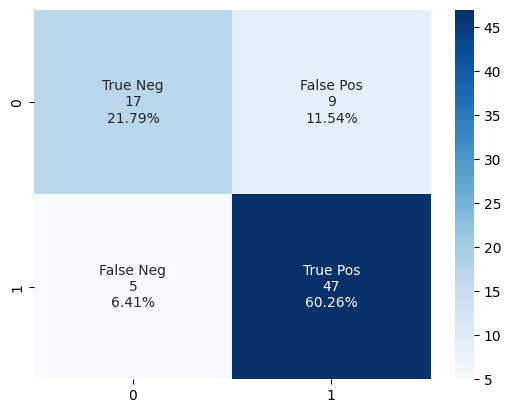

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')